Load Dataset

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [129]:
X, y = make_blobs(centers=4, n_samples=500, n_features=2, shuffle=True, random_state=40)

clusters = len(np.unique(y))

Model

In [130]:
def Euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [131]:
class KMeans:
    def __init__(self, k=5, num_iters=200):
        self.k = k
        self.num_iters = num_iters
        
        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.k)]
        
        self.centroids = list()
        
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize centroids
        centroids_idxs = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.X[idx] for idx in centroids_idxs]
        
        # optimize
        for _ in range(self.num_iters):
            #update clusters
            self.clusters = self._create_clusters(self.centroids)
            
            #update centroids
            old_centroids = self.centroids
            self.centroids = self._get_updated_centroids(self.clusters)
            
            #converge
            if self._is_converged(old_centroids, self.centroids):
                break
            
        return self._get_cluster_labels(self.clusters)
    
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for idx, cluster in enumerate(clusters):
            for sample in cluster:
                labels[sample] = idx      
        return labels
            
    
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]   
        for idx, x in enumerate(self.X):
            center_blong = self._which_center(x, centroids)
            clusters[center_blong].append(idx)
        return clusters
    
    def _which_center(self, x, centroids):
        distances = [Euclidean_distance(x, center) for center in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_updated_centroids(self, clusters):
        centroids = np.zeros((self.k, self.n_features))
        for idx, cluster in enumerate(clusters):
            avg = np.mean(self.X[cluster], axis=0)
            centroids[idx] = avg
        return centroids
    
    def _is_converged(self, old_centroids, cur_centroids):
        distances = [Euclidean_distance(old_centroids[idx], cur_centroids[idx]) for idx in range(self.k)]
        return np.sum(distances) == 0
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(4, 4))
        
        for i, index in enumerate(self.clusters):
            points = self.X[index].T
            ax.scatter(*points)
            
        for point in self.centroids:
            ax.scatter(*point, marker='X', color='y', linewidth=2)
        
        plt.axis('off')
        plt.show()

Testing and Plot

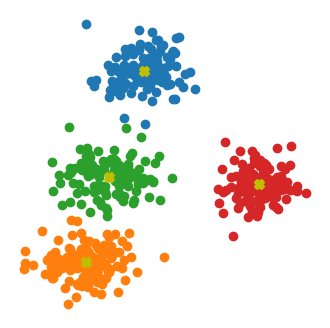

In [132]:
k = KMeans(k=clusters)
g = k.predict(X)
k.plot()